使用高斯分布（正太分布）来进行异常检测

1. 选择特征$x_i$来作为可能是异常样本的分类指标
2. 计算参数$\mu_1,...,\mu_n,\sigma_1^2,...,\sigma_n^2$，其中$n$为特征向量的维度
$$\mu_j=\frac{1}{m}\sum_{i=1}^m x_j^{(i)}$$
$$\sigma_j^2=\frac{1}{m}\sum_{i=1}^m(x_j^{(i)}-\mu_j)^2$$
3. 给定一个新的样本$x$，计算$p(x)$：
$$p(x)=\prod_{j=1}^n p(x_j;\mu_j,\sigma_j^2)=\prod_{j=1}^n \frac{1}{\sqrt{2\pi}\sigma_j}e^{-\frac{(x_i-\mu_j)^2}{2\sigma_j^2}}$$

如果$p(x)<\epsilon$,则一个样本为异常

In [1]:
import torch
import matplotlib.pyplot as plt
from pyecharts import options
import math

In [2]:
data = torch.normal(torch.ones(50, 2), torch.tensor([1.]))

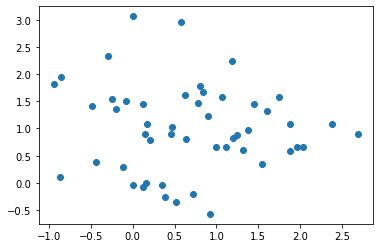

In [3]:
plt.scatter(data.numpy()[:, 0], data.numpy()[:, 1])
plt.show()

In [4]:
u = data.mean(dim=0)
sigma_square = (data - u).pow(2).mean(dim=0)


def probability(x):
    t = (sigma_square * 2 * math.pi).rsqrt()
    e = -((x - u).pow(2) / (2 * sigma_square))
    return (t * math.e**e).prod()

In [6]:
probability(torch.tensor([1, 1],dtype=torch.float32))

tensor(0.2211)